# MASTER - Notebook 1
### Matteo Grazioso 884055

In [369]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

import myfunctions as mf # Custom functions

In [370]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [371]:
# Find all txt files in the data folder
txt_files = mf.find_txt_files("data/raw")

# Choose a dataset from the list of txt files
selected_dataset = mf.choose_dataset(txt_files)

if selected_dataset:
    print(f"You selected the dataset {selected_dataset}")
else:
    print("No dataset selected.")

path  = selected_dataset

The following TXT files were found:
1. data/raw/0-export.txt
2. data/raw/1-validazioni.txt
3. data/raw/2-esportazioneCompleta.txt
4. data/raw/3-esportazionePasqua23.txt
You selected the dataset data/raw/3-esportazionePasqua23.txt


In [372]:
# The file contain the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file 
# path = 'data/raw/1-validazioni.txt'                     # Period: 2022-05-13 to 2022-07-15
# path = 'data/raw/2-esportazioneCompleta.txt'            # Period: 2023-01-23 to 2023-03-14
# path = 'data/raw/3-esportazionePasqua23.txt'            # Period: 2023-04-04 to 2023-06-03

df = pd.read_csv(path, header=0, sep='\t')
# Save the name of the file in a variable for future use extracting the name of the file from the path
file_name = path.split('/')[-1].split('.')[0]
# Remove the number and the - character from the head of the file name
file_name = file_name [file_name.find('-')+1:]


In [373]:
file_name

'esportazionePasqua23'

In [374]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,04/04/2023 00:00,-2854957894,5032,"Ferrovia ""B""",11209,Bigl RETE UNICA 75'
1,04/04/2023 00:00,-2854992707,5032,"Ferrovia ""B""",23101,Mensile ordinario Rete Unica
2,04/04/2023 00:00,-2821778289,5022,Giudecca Pal,23101,Mensile ordinario Rete Unica
3,04/04/2023 00:00,-3613120484,5028,"P.le Roma ""E",23301,Mens.Studente Rete Unica
4,04/04/2023 00:00,-3604951458,5028,"P.le Roma ""E",23301,Mens.Studente Rete Unica


In [375]:
# Check the last 5 rows of the data
df.tail()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
8644442,03/06/2023 23:59,-3613117827,5049,"Zattere ""B""",11209,Bigl RETE UNICA 75'
8644443,03/06/2023 23:59,65694191815653125,506,VENEZIA,12101,Bigl.Aut.75'Mestre/Lido-tsc
8644444,03/06/2023 23:59,65694191809363717,506,VENEZIA,12101,Bigl.Aut.75'Mestre/Lido-tsc
8644445,03/06/2023 23:59,65694191809363205,506,VENEZIA,12101,Bigl.Aut.75'Mestre/Lido-tsc
8644446,03/06/2023 23:59,-2824236012,5032,"Ferrovia ""B""",20003,Mensile ORDINARIO ISOLE


In [376]:
# Create a subset of the data with the first 10% of the rows and the last 10% of the rows
# df = df.iloc[:int(len(df)*0.1),:]
# df = df.append(df.iloc[-int(len(df)*0.1):,:])


## Explorative Data Analysis


In [377]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
# df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,2023-04-04,00:00:00,04/04/2023 00:00,-2854957894,5032,"Ferrovia ""B""",11209,Bigl RETE UNICA 75'
1,2023-04-04,00:00:00,04/04/2023 00:00,-2854992707,5032,"Ferrovia ""B""",23101,Mensile ordinario Rete Unica
2,2023-04-04,00:00:00,04/04/2023 00:00,-2821778289,5022,Giudecca Pal,23101,Mensile ordinario Rete Unica
3,2023-04-04,00:00:00,04/04/2023 00:00,-3613120484,5028,"P.le Roma ""E",23301,Mens.Studente Rete Unica
4,2023-04-04,00:00:00,04/04/2023 00:00,-3604951458,5028,"P.le Roma ""E",23301,Mens.Studente Rete Unica


In [378]:
# Set the format of the timestamp
df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'], format='%d/%m/%Y %H:%M')

In [379]:
# Print the date of the first and last validation using both data and hour
print('First validation: ', df['DATA'].min(), df['ORA'].min())
print('Last validation: ', df['DATA'].max(), df['ORA'].max())

# Print the number of Serial numbers
print('Number of Serial numbers: ', df['SERIALE'].nunique())

# Print the number of validation (rows)
print('Number of validation: ', df.shape[0])

# Print the number of tickets
print('Number of tickets: ', df['DESCRIZIONE_TITOLO'].nunique())
# Print the number of titolo
print('Number of titolo: ', df['TITOLO'].nunique())
# TODO: why the number of unique TITOLO is different from the number of DESCRIZIONE_TITOLO?

# Print the number of FERMATA
print('Number of FERMATA: ', df['FERMATA'].nunique())
# Print the number of DESCRIZIONE
print('Number of DESCRIZIONE: ', df['DESCRIZIONE'].nunique())
# TODO: why the number of unique DESCRIZIONE is different from the number of FERMATA?

First validation:  2023-04-04 00:00:00 00:00:00
Last validation:  2023-06-03 00:00:00 23:59:00
Number of Serial numbers:  2326665
Number of validation:  8644447
Number of tickets:  326
Number of titolo:  327
Number of FERMATA:  1861
Number of DESCRIZIONE:  1002


In [380]:
# Which is the most used ticket?
df['DESCRIZIONE_TITOLO'].value_counts().head(10)

Bigl RETE UNICA 75'             1326912
DailyP-Tpl19,90-C.Ve5,10        1101672
Mensile ordinario Rete Unica     920090
75'-Tpl 8,64-ComVe0,86           835654
48h-Tpl 29,90-ComVe5,10          634080
72h-Tpl 38,40-ComVe6,60          498516
Bigl.Aut.75'Mestre/Lido-tsc      484459
Annuale ordinario Rete Unica     352778
7gg-Tpl 48,60-ComVe16,40         290537
72ore online no aerobus          136603
Name: DESCRIZIONE_TITOLO, dtype: int64

In [381]:
# Which is the most frequent validation in date and hour?
# Date and hour are in two different columns; DATA_VALIDAZIONE does not exist anymore
df.groupby(['DATA', 'ORA'])['SERIALE'].count().sort_values(ascending=False).head(10)
# TODO: #4 Re-aswer the question of the most frequent validation after cleaning operations

DATA        ORA     
2023-05-11  16:21:00    398
2023-04-08  16:41:00    377
2023-04-09  11:31:00    372
2023-04-08  16:01:00    370
            10:28:00    369
2023-05-12  04:03:00    369
2023-04-23  11:29:00    365
2023-04-08  16:32:00    363
2023-04-07  11:10:00    362
2023-05-19  11:31:00    361
Name: SERIALE, dtype: int64

In [382]:
# Which is the most frequent FERMATA?
df['DESCRIZIONE'].value_counts().head(10)
# TODO: #4 Re-aswer the question of the most frequent FERMATA after cleaning operations

Lido S.M.E.     656301
P.le Roma "G    539670
San Marco-Sa    412781
Rialto "C"      412478
VENEZIA         371025
Burano "C"      343788
S. Marco-San    301119
Ferrovia "B"    256850
P.le Roma "E    238979
PEOPLE MOVER    203603
Name: DESCRIZIONE, dtype: int64

## Categories

In [383]:
# Add a new column with the code profile of the ticket
df.insert(7, "TICKET_CODE", 'TBD')

This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:

**1.** One-day ticket

**2.** Two-day ticket

**3.** Three-day ticket

**4.** Weekly ticket (Seven-day ticket)

**5.** Monthly ticket

**5-STUD.** Monthly ticket for students

**5-RET.** Monthly ticket for retirees

**5-WKRS.** Monthly ticket for workers

**6.** Annual ticket

**6-STUD.** Annual ticket for students

**6-RET.** Annual ticket for retirees

**6-WKRS.** Annual ticket for workers

**7.** 75 minutes ticket

**8.** Other ticket (if it is necessary to add other types of tickets)

In [384]:
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO
0,2023-04-04,00:00:00,2023-04-04,-2854957894,5032,"Ferrovia ""B""",11209,TBD,Bigl RETE UNICA 75'
1,2023-04-04,00:00:00,2023-04-04,-2854992707,5032,"Ferrovia ""B""",23101,TBD,Mensile ordinario Rete Unica
2,2023-04-04,00:00:00,2023-04-04,-2821778289,5022,Giudecca Pal,23101,TBD,Mensile ordinario Rete Unica
3,2023-04-04,00:00:00,2023-04-04,-3613120484,5028,"P.le Roma ""E",23301,TBD,Mens.Studente Rete Unica
4,2023-04-04,00:00:00,2023-04-04,-3604951458,5028,"P.le Roma ""E",23301,TBD,Mens.Studente Rete Unica


In [385]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', 
                '5': 'Monthly ticket', '5-STUD': 'Monthly ticket for students',
                '5-RET': 'Monthly ticket for retired', '5-WKRS': 'Monthly ticket for workers',
                '6': 'Annual ticket', '6-STUD': 'Annual ticket for students', '6-RET': 'Annual ticket for retired',
                '6-WKRS': 'Annual ticket for workers',
                '7': '75 minutes ticket', '8': 'Other ticket'}

# Export the dictionary to a json file
with open('data/dictionaries/dict_ticket_codes.json', 'w') as fp:
    json.dump(dict_tickets, fp)

In [386]:
# How many unique values are there in the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].nunique()

326

In [387]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(["Bigl RETE UNICA 75'", 'Mensile ordinario Rete Unica',
       'Mens.Studente Rete Unica', 'Bigl Aer-Venezia TSC',
       'Annuale ordinario Rete Unica', 'Libera circ. DUE RETI',
       'Abb stud. ReteUnica 12 mesi ', 'DailyP-Tpl19,90-C.Ve5,10',
       '48h online aerobus CS 1 mese', 'Abb. over75 GRATUITO',
       'Mensile ORDINARIO ISOLE', "75'-Tpl 8,64-ComVe0,86",
       "Bigl.Aut.75'Mestre/Lido-tsc", "75'-Tpl 6,64-ComVe0,86",
       '72h-Tpl 38,40-ComVe6,60', '72 ore R.Venice+aeroporto AR',
       "Bigl.Mestre/Lido 75' a bordo", 'Libera circ. RETE intera',
       'Mensile Ordinario extra', '48h-Tpl 29,90-ComVe5,10',
       'Traghetto Carta Venezia', 'Linea 17-categoria D',
       'Annuale ORDINARIO ISOLE', 'Aeroporto-Venezia AR',
       'Aeroporto-Venezia AR ONLINE', 'Biglietto 72 ore Roll. Venice',
       'Linea 11+17 categoria C', 'Linea 11-categoria B',
       'Linea 11-categoria D', 'Linea 11-categoria C',
       "ord. navigazione 75' online", 'Tessera di servizio ACTV',
 

In [388]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  326


In [389]:
# Convert the column 'DESCRIZIONE_TITOLO' into upper case 
df['DESCRIZIONE_TITOLO'] = df['DESCRIZIONE_TITOLO'].str.upper()
# Count the number of unique values of the column 'DESCRIZIONE_TITOLO'
df['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               1326912
DAILYP-TPL19,90-C.VE5,10          1101672
MENSILE ORDINARIO RETE UNICA       920090
75'-TPL 8,64-COMVE0,86             835654
48H-TPL 29,90-COMVE5,10            634080
72H-TPL 38,40-COMVE6,60            498516
BIGL.AUT.75'MESTRE/LIDO-TSC        484459
ANNUALE ORDINARIO RETE UNICA       352778
7GG-TPL 48,60-COMVE16,40           290537
72ORE ONLINE NO AEROBUS            136603
BIGLIETTO 72 ORE ROLL. VENICE      135415
MENS.STUDENTE RETE UNICA           128533
7 DAYS ONLINE NO AEROBUS           109624
PEOPLEMOVER+BUS+TRAM 75'           104347
MENSILE ORDINARIO ISOLE            101638
ANNUALE ORDINARIO ISOLE             93802
48ORE ONLINE NO AEROBUS             84981
72 ORE R.VENICE ONLINE              74244
BIGL AER-VENEZIA TSC                69375
ABB STUD. RETEUNICA 12 MESI         67457
ABB. RETE INTERA A20                54608
DAILY PASS VENEZIA ONLINE           53379
MOBILITY ORDINARIO RETE UNICA       47998
TESSERA DI SERVIZIO ACTV          

### One-day tickets

In [390]:
# Which type of ticket are one-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY')]['DESCRIZIONE_TITOLO'].value_counts()

DAILYP-TPL19,90-C.VE5,10          1101672
DAILY PASS VENEZIA ONLINE           53379
CAV -TREP + ACTV 24H                11280
24HAERCS-TPL26,90-CVE5,10            8542
JESOLO + ACTV 24H                    8505
T.FUSINA VE+ACTV 24 ORE              5403
DAILY PASS VE. ONLINE 1MESE          4836
24HAERAR-TPL32,90-CVE5,10            1195
24ORE ONLINE AEROBUS CS               937
24H ONLINE AEROBUS CS 1 MESE          375
24ORE ONLINE AEROBUS AR               287
24H-24 ORE                            222
24ORE ONLINE NO AEROBUS               169
VILLE V+24H TPL28,50 C.VE 5,10         90
24H ONLINE AEROBUS AR 1 MESE           79
ARRIVA MISTO ACTV 24H                  34
CAMP.MARINA+ACTV 24H                    5
Name: DESCRIZIONE_TITOLO, dtype: int64

In [391]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY'), 'TICKET_CODE'] = '1'

In [392]:
# TICKET_CODE = 1: Information about one-day tickets
print("The number of one-day tickets is: ", df[df['TICKET_CODE'] == '1'].shape[0])
print("The number of tickets for each type of one-day ticket is: ")
df[df['TICKET_CODE'] == '1']['DESCRIZIONE_TITOLO'].value_counts()

The number of one-day tickets is:  1197010
The number of tickets for each type of one-day ticket is: 


DAILYP-TPL19,90-C.VE5,10          1101672
DAILY PASS VENEZIA ONLINE           53379
CAV -TREP + ACTV 24H                11280
24HAERCS-TPL26,90-CVE5,10            8542
JESOLO + ACTV 24H                    8505
T.FUSINA VE+ACTV 24 ORE              5403
DAILY PASS VE. ONLINE 1MESE          4836
24HAERAR-TPL32,90-CVE5,10            1195
24ORE ONLINE AEROBUS CS               937
24H ONLINE AEROBUS CS 1 MESE          375
24ORE ONLINE AEROBUS AR               287
24H-24 ORE                            222
24ORE ONLINE NO AEROBUS               169
VILLE V+24H TPL28,50 C.VE 5,10         90
24H ONLINE AEROBUS AR 1 MESE           79
ARRIVA MISTO ACTV 24H                  34
CAMP.MARINA+ACTV 24H                    5
Name: DESCRIZIONE_TITOLO, dtype: int64

In [393]:
print("Information about the tickets with code 1 related to the serial number: ")
df[df['TICKET_CODE'] == '1'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 1 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H ONLINE AEROBUS AR 1 MESE,17.0,4.647059,1.578812,2.0,3.00,5.0,6.00,7.0
24H ONLINE AEROBUS CS 1 MESE,96.0,3.906250,2.366779,1.0,2.00,3.0,5.00,11.0
24H-24 ORE,101.0,2.198020,1.029755,1.0,1.00,2.0,3.00,5.0
"24HAERAR-TPL32,90-CVE5,10",293.0,4.078498,2.532795,1.0,2.00,4.0,5.00,15.0
"24HAERCS-TPL26,90-CVE5,10",1985.0,4.303275,2.647601,1.0,2.00,4.0,6.00,20.0
24ORE ONLINE AEROBUS AR,68.0,4.220588,2.946516,1.0,2.00,4.0,5.00,13.0
24ORE ONLINE AEROBUS CS,181.0,5.176796,2.637699,1.0,3.00,5.0,7.00,14.0
24ORE ONLINE NO AEROBUS,61.0,2.770492,1.407047,1.0,2.00,2.0,3.00,7.0
ARRIVA MISTO ACTV 24H,4.0,8.500000,1.732051,7.0,7.00,8.5,10.00,10.0


### Two days tickets

In [394]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

48H-TPL 29,90-COMVE5,10         634080
48ORE ONLINE NO AEROBUS          84981
48HAERCS-TPL36,90-CVE5,10        10429
48H ONLINE NO AEROBUS 1MESE       9532
48HAERAR-TPL42,90-CVE5,10         4095
48ORE ONLINE AEROBUS CS           2247
48H ONLINE AEROBUS CS 1 MESE      1427
48ORE ONLINE AEROBUS AR           1189
48H ONLINE AEROBUS AR 1 MESE       206
Name: DESCRIZIONE_TITOLO, dtype: int64

In [395]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE'), 'TICKET_CODE'] = '2'

In [396]:
# TICKET_CODE = 2: Information about two-day tickets
print("The number of two-day tickets is: ", df[df['TICKET_CODE'] == '2'].shape[0])
print("The number of tickets for each type of two-day ticket is: ")
df[df['TICKET_CODE'] == '2']['DESCRIZIONE_TITOLO'].value_counts()

The number of two-day tickets is:  748186
The number of tickets for each type of two-day ticket is: 


48H-TPL 29,90-COMVE5,10         634080
48ORE ONLINE NO AEROBUS          84981
48HAERCS-TPL36,90-CVE5,10        10429
48H ONLINE NO AEROBUS 1MESE       9532
48HAERAR-TPL42,90-CVE5,10         4095
48ORE ONLINE AEROBUS CS           2247
48H ONLINE AEROBUS CS 1 MESE      1427
48ORE ONLINE AEROBUS AR           1189
48H ONLINE AEROBUS AR 1 MESE       206
Name: DESCRIZIONE_TITOLO, dtype: int64

In [397]:
print("Information about the tickets with code 2 related to the serial number: ")
df[df['TICKET_CODE'] == '2'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 2 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
48H ONLINE AEROBUS AR 1 MESE,33.0,6.242424,2.704514,2.0,4.0,5.0,9.0,11.0
48H ONLINE AEROBUS CS 1 MESE,192.0,7.432292,3.451322,1.0,5.0,7.0,10.0,22.0
48H ONLINE NO AEROBUS 1MESE,1403.0,6.794013,3.702129,1.0,4.0,6.0,9.0,27.0
"48H-TPL 29,90-COMVE5,10",95840.0,6.616027,3.576207,1.0,4.0,6.0,9.0,74.0
"48HAERAR-TPL42,90-CVE5,10",507.0,8.076923,3.880121,1.0,5.0,8.0,10.0,23.0
"48HAERCS-TPL36,90-CVE5,10",1303.0,8.003837,4.051415,1.0,5.0,8.0,10.0,25.0
48ORE ONLINE AEROBUS AR,156.0,7.621795,4.003777,1.0,4.0,7.5,10.0,19.0
48ORE ONLINE AEROBUS CS,318.0,7.066038,3.314062,1.0,5.0,7.0,9.0,19.0
48ORE ONLINE NO AEROBUS,13441.0,6.322521,3.427511,1.0,4.0,6.0,8.0,35.0


### Three days tickets

In [398]:
# Which type of ticket are three-day tickets and how many are there?
# Do not consider the ticket that contains also 75
df[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

72H-TPL 38,40-COMVE6,60           498516
72ORE ONLINE NO AEROBUS           136603
BIGLIETTO 72 ORE ROLL. VENICE     135415
72 ORE R.VENICE ONLINE             74244
72H ONLINE NO AEROBUS 1MESE        19975
72H R.VENICE ONLINE 1 MESE         17526
72HAERAR-TPL51,40-CVE6,60          11627
72HAERCS-TPL45,40-CVE6,60          11517
72 ORE R.VENICE+AEROPORTO CS        8443
72ORE ONLINE AEROBUS AR             6892
72 ORE R.VENICE+AEROPORTO AR        5863
72ORE ONLINE AEROBUS CS             4905
72H R.VENICE+AEROP.AR ONLINE        4747
72H RVENICE+AEROP.CS ONLINE         4379
ATVO CANOVA+ACTV 72H ONLINE         4316
ATVOCANOVA+ACTV 72HROLL.ONLINE      2599
T.FUSINA VE+ACTV 72 ORE             2523
72H ONLINE AEROBUS CS 1 MESE        2096
72H ONLINE AEROBUS AR 1 MESE        1998
72H RVE+AEROP.CS ONLINE 1 MESE      1914
ATVO CANOVA+ACTV 72H                1379
72H R.VE.+AER.AR ONLINE 1MESE       1028
CAV - TREP + ACTV 72H                603
Name: DESCRIZIONE_TITOLO, dtype: int64

In [399]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE'), 'TICKET_CODE'] = '3'

In [400]:
# TICKET_CODE = 3: Information about three-day tickets
print("The number of three-day tickets is: ", df[df['TICKET_CODE'] == '3'].shape[0])
print("The number of tickets for each type of three-day ticket is: ")
df[df['TICKET_CODE'] == '3']['DESCRIZIONE_TITOLO'].value_counts()

The number of three-day tickets is:  959108
The number of tickets for each type of three-day ticket is: 


72H-TPL 38,40-COMVE6,60           498516
72ORE ONLINE NO AEROBUS           136603
BIGLIETTO 72 ORE ROLL. VENICE     135415
72 ORE R.VENICE ONLINE             74244
72H ONLINE NO AEROBUS 1MESE        19975
72H R.VENICE ONLINE 1 MESE         17526
72HAERAR-TPL51,40-CVE6,60          11627
72HAERCS-TPL45,40-CVE6,60          11517
72 ORE R.VENICE+AEROPORTO CS        8443
72ORE ONLINE AEROBUS AR             6892
72 ORE R.VENICE+AEROPORTO AR        5863
72ORE ONLINE AEROBUS CS             4905
72H R.VENICE+AEROP.AR ONLINE        4747
72H RVENICE+AEROP.CS ONLINE         4379
ATVO CANOVA+ACTV 72H ONLINE         4316
ATVOCANOVA+ACTV 72HROLL.ONLINE      2599
T.FUSINA VE+ACTV 72 ORE             2523
72H ONLINE AEROBUS CS 1 MESE        2096
72H ONLINE AEROBUS AR 1 MESE        1998
72H RVE+AEROP.CS ONLINE 1 MESE      1914
ATVO CANOVA+ACTV 72H                1379
72H R.VE.+AER.AR ONLINE 1MESE       1028
CAV - TREP + ACTV 72H                603
Name: DESCRIZIONE_TITOLO, dtype: int64

In [401]:
print("Information about the tickets with code 3 related to the serial number: ")
df[df['TICKET_CODE'] == '3'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 3 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
72 ORE R.VENICE ONLINE,8579.0,8.654155,4.547422,1.0,5.0,8.0,11.0,39.0
72 ORE R.VENICE+AEROPORTO AR,555.0,10.563964,4.914518,1.0,7.0,10.0,13.0,43.0
72 ORE R.VENICE+AEROPORTO CS,866.0,9.749423,4.770408,1.0,6.0,9.0,13.0,28.0
72H ONLINE AEROBUS AR 1 MESE,187.0,10.684492,4.813950,2.0,7.0,10.0,14.0,25.0
72H ONLINE AEROBUS CS 1 MESE,210.0,9.980952,4.733028,1.0,7.0,10.0,13.0,27.0
72H ONLINE NO AEROBUS 1MESE,2245.0,8.897550,4.776299,1.0,5.0,8.0,12.0,35.0
72H R.VE.+AER.AR ONLINE 1MESE,97.0,10.597938,4.782041,2.0,7.0,11.0,13.0,23.0
72H R.VENICE ONLINE 1 MESE,2147.0,8.163018,4.449098,1.0,5.0,8.0,11.0,39.0
72H R.VENICE+AEROP.AR ONLINE,445.0,10.667416,4.816165,1.0,7.0,10.0,14.0,30.0


### Seven days tickets

In [402]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS')]['DESCRIZIONE_TITOLO'].value_counts()

7GG-TPL 48,60-COMVE16,40          290537
7 DAYS ONLINE NO AEROBUS          109624
7 DAYS ONLINE NO AEROBUS 1MESE     19664
7 DAYS ONLINE AEROBUS AR           16486
7GGAERAR-TPL61,60-CVE16,40         16448
7 DAYS ONLINE AEROBUS AR 1MESE      6432
7GGAERCS-TPL55,60-CVE16,40          5278
7 DAYS ONLINE AEROBUS CS            3796
7 DAYS ONLINE AEROBUS CS 1MESE      1826
Name: DESCRIZIONE_TITOLO, dtype: int64

In [403]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS'), 'TICKET_CODE'] = '4'

In [404]:
# TICKET_CODE = 4: Information about weekly tickets
print("The number of weekly tickets is: ", df[df['TICKET_CODE'] == '4'].shape[0])
print("The number of tickets for each type of weekly ticket is: ")
df[df['TICKET_CODE'] == '4']['DESCRIZIONE_TITOLO'].value_counts()

The number of weekly tickets is:  470091
The number of tickets for each type of weekly ticket is: 


7GG-TPL 48,60-COMVE16,40          290537
7 DAYS ONLINE NO AEROBUS          109624
7 DAYS ONLINE NO AEROBUS 1MESE     19664
7 DAYS ONLINE AEROBUS AR           16486
7GGAERAR-TPL61,60-CVE16,40         16448
7 DAYS ONLINE AEROBUS AR 1MESE      6432
7GGAERCS-TPL55,60-CVE16,40          5278
7 DAYS ONLINE AEROBUS CS            3796
7 DAYS ONLINE AEROBUS CS 1MESE      1826
Name: DESCRIZIONE_TITOLO, dtype: int64

In [405]:
print("Information about the tickets with code 4 related to the serial number: ")
df[df['TICKET_CODE'] == '4'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 4 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
7 DAYS ONLINE AEROBUS AR,1088.0,15.152574,7.281226,1.0,10.0,14.0,19.0,45.0
7 DAYS ONLINE AEROBUS AR 1MESE,402.0,16.000000,6.908739,2.0,11.0,15.0,21.0,45.0
7 DAYS ONLINE AEROBUS CS,245.0,15.493878,8.528458,1.0,9.0,14.0,20.0,42.0
7 DAYS ONLINE AEROBUS CS 1MESE,125.0,14.608000,6.840223,1.0,10.0,14.0,19.0,30.0
7 DAYS ONLINE NO AEROBUS,8369.0,13.098817,7.214824,1.0,8.0,12.0,17.0,54.0
7 DAYS ONLINE NO AEROBUS 1MESE,1406.0,13.985775,7.333913,1.0,9.0,13.0,18.0,51.0
"7GG-TPL 48,60-COMVE16,40",20628.0,14.084594,8.136821,1.0,8.0,13.0,18.0,115.0
"7GGAERAR-TPL61,60-CVE16,40",1052.0,15.634981,7.881003,1.0,10.0,15.0,20.0,43.0
"7GGAERCS-TPL55,60-CVE16,40",349.0,15.123209,8.775243,1.0,8.0,14.0,20.0,50.0


### Monthly tickets

In [406]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS')]['DESCRIZIONE_TITOLO'].value_counts()

MENSILE ORDINARIO RETE UNICA      920090
MENS.STUDENTE RETE UNICA          128533
MENSILE ORDINARIO ISOLE           101638
SUPP MENS.NAVIGAZIONE              29264
MENSILE ORDINARIO EXTRA            29112
MENSILE ORD. RES. PELLESTRINA      11446
MENSILE STUDENTE ISOLE              6663
ATVO+ACTV MENS.LAV.F1               5031
MENSILE STUDENTE EXTRA              4060
ATVO+ACTV MENS.STUD.F1              2866
ATVO+ACTV MENS.LAV.F2               2775
ATVO+ACTV MENS.ORD.F1               1887
ABB. MENSILE CHIOGGIA               1744
ATVO+ACTV MENS.STUD.F2              1688
MENSILE STUD. PELLESTRINA           1595
ABBONAMENTO 30 GG.PEOPLEMOVER       1302
ATVO+ACTV MENS.ORD.F2                805
ABB MENSILE PEOPLEMOVER              609
SUPP MENS.AUTOMOBILISTICO            492
ABB. STUDENTE MENS. CHIOGGIA         303
ATVO+ACTV MENS.20%.F2                290
ATVO+ACTV MENS.20%.F1                275
MENS. COSE ANIMALI RETE INTERA       213
MENSILE PARK+RETE INTERA              96
ATVO+ACTV MENS.O

In [407]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS'), 'TICKET_CODE'] = '5'

In [408]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '5-STUD' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD')), 'TICKET_CODE'] = '5-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '5-WKRS' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV')), 'TICKET_CODE'] = '5-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '5-RET' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '5-RET'

In [409]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the DDRG 1201-1297/2022 tickets are monthly tickets for blind people

# Which type of ticket are yearly tickets for blind people and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022')]['DESCRIZIONE_TITOLO'].value_counts()

DDGR1201-1297/2022 EXTRA       15
DDGR1201-1297/2022 R. UNICA     2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [410]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022'), 'TICKET_CODE'] = '5'

In [411]:
# TICKET_CODE = 5: Information about monthly tickets
print("The number of monthly tickets is: ", df[df['TICKET_CODE'] == '5'].shape[0])
print("The number of monthly tickets for students is: ", df[df['TICKET_CODE'] == '5-STUD'].shape[0])
print("The number of monthly tickets for workers is: ", df[df['TICKET_CODE'] == '5-WKRS'].shape[0])
print("The number of monthly tickets for retired people is: ", df[df['TICKET_CODE'] == '5-RET'].shape[0])

print("The number of tickets for each type of monthly ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of monthly tickets is:  1099590
The number of monthly tickets for students is:  145782
The number of monthly tickets for workers is:  7862
The number of monthly tickets for retired people is:  0
The number of tickets for each type of monthly ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
5            MENSILE ORDINARIO RETE UNICA      920090
             MENSILE ORDINARIO ISOLE           101638
             SUPP MENS.NAVIGAZIONE              29264
             MENSILE ORDINARIO EXTRA            29112
             MENSILE ORD. RES. PELLESTRINA      11446
             ATVO+ACTV MENS.ORD.F1               1887
             ABB. MENSILE CHIOGGIA               1744
             ABBONAMENTO 30 GG.PEOPLEMOVER       1302
             ATVO+ACTV MENS.ORD.F2                805
             ABB MENSILE PEOPLEMOVER              609
             SUPP MENS.AUTOMOBILISTICO            492
             ATVO+ACTV MENS.20%.F2                290
             ATVO+ACTV MENS.20%.F1                275
             MENS. COSE ANIMALI RETE INTERA       213
             MENSILE PARK+RETE INTERA              96
             ATVO+ACTV MENS.ORD.F3                 74
             ATVO+ACTV MENS.20%.F3                 70
             MENS. COSE ANIMALI RETE U

In [412]:
print("Information about the tickets with code 5 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 5 (including the subtypes) related to the serial number: 


count       mean        std  \
TICKET_CODE DESCRIZIONE_TITOLO                                              
5           ABB MENSILE PEOPLEMOVER            15.0  40.600000  26.545917   
            ABB. MENSILE CHIOGGIA             155.0  11.251613  15.234357   
            ABBONAMENTO 30 GG.PEOPLEMOVER     254.0   5.125984   9.275743   
            ARRIVA AEROPORTO O.MENS             5.0   9.400000   8.018728   
            ATVO+ACTV MENS.20%.F1               7.0  39.285714  41.998866   
            ATVO+ACTV MENS.20%.F2               7.0  41.428571  36.895606   
            ATVO+ACTV MENS.20%.F3               2.0  35.000000  46.669048   
            ATVO+ACTV MENS.5%.F2                1.0  23.000000        NaN   
            ATVO+ACTV MENS.ORD.F1              43.0  43.883721  32.633761   
            ATVO+ACTV MENS.ORD.F2              15.0  53.666667  32.466833   
            ATVO+ACTV MENS.ORD.F3               2.0  37.000000  35.355339   
            DDGR1201-1297/2022 EXTRA            5.0   3.000000   1.581139   
            DDGR1201-1297/2022 R. UNICA         2.0   1.000000   0.000000   
            MENS. COSE ANIMALI RETE INTERA     19.0  11.210526  22.537817   
            MENS. COSE ANIMALI RETE UNICA       5.0  11.400000  12.541930   
            MENSILE ORD. RES. PELLESTRINA     986.0  11.608519  15.849639   
            MENSILE ORDINARIO EXTRA          2467.0  11.800567  19.894163   
            MENSILE ORDINARIO ISOLE          4536.0  22.406966  26.668014   
            MENSILE ORDINARIO RETE UNICA    36609.0  25.132891  28.948319   
            MENSILE PARK+RETE INTERA            4.0  24.000000  31.464265   
            SUPP MENS.AUTOMOBILISTICO          58.0   8.482759  12.209058   
            SUPP MENS.NAVIGAZIONE             988.0  29.619433  26.626786   
            SUPP MENS.URBANO CHIOGGIA           3.0   1.000000   0.000000   
            SUPP MENSILE PEOPLEMOVER            2.0  18.000000  19.798990   
5-STUD      ABB. STUDENTE MENS. CHIOGGIA       44.0   6.886364  11.436815   
            ATVO+ACTV MENS.STUD.F1            104.0  27.557692  26.213028   
            ATVO+ACTV MENS.STUD.F2             65.0  25.969231  24.825623   
            ATVO+ACTV MENS.STUD.F3              3.0  10.000000   8.544004   
            MENS. STUDENTE BUS LIDO            23.0   1.913043   0.996040   
            MENS.STUDENTE RETE UNICA         9759.0  13.170714  19.107005   
            MENSILE STUD. PELLESTRINA         193.0   8.264249  10.715430   
            MENSILE STUDENTE EXTRA           1080.0   3.759259   7.304537   
            MENSILE STUDENTE ISOLE            516.0  12.912791  16.763406   
5-WKRS      ATVO+ACTV MENS.LAV.F1             128.0  39.304688  31.415067   
            ATVO+ACTV MENS.LAV.F2              48.0  57.812500  36.570338   
            ATVO+ACTV MENS.LAV.F3               1.0  56.000000        NaN   

                                             min   25%   50%    75%    max  
TICKET_CODE DESCRIZIONE_TITOLO                                              
5           ABB MENSILE PEOPLEMOVER          2.0  19.5  47.0  61.50   76.0  
            ABB. MENSILE CHIOGGIA            1.0   2.0   7.0  14.00  111.0  
            ABBONAMENTO 30 GG.PEOPLEMOVER    1.0   1.0   2.0   3.00   44.0  
            ARRIVA AEROPORTO O.MENS          2.0   6.0   7.0   9.00   23.0  
            ATVO+ACTV MENS.20%.F1            1.0   3.0  24.0  69.00  106.0  
            ATVO+ACTV MENS.20%.F2            4.0  15.0  30.0  60.50  105.0  
            ATVO+ACTV MENS.20%.F3            2.0  18.5  35.0  51.50   68.0  
            ATVO+ACTV MENS.5%.F2            23.0  23.0  23.0  23.00   23.0  
            ATVO+ACTV MENS.ORD.F1            1.0  19.5  34.0  66.00  136.0  
            ATVO+ACTV MENS.ORD.F2           10.0  33.0  51.0  67.50  122.0  
            ATVO+ACTV MENS.ORD.F3           12.0  24.5  37.0  49.50   62.0  
            DDGR1201-1297/2022 EXTRA         1.0   2.0   3.0   4.00    5.0  
            DDGR1201-1297/2022 R. UNICA  

### Yearly tickets

In [413]:
# Which type of ticket are yearly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI')]['DESCRIZIONE_TITOLO'].value_counts()

ANNUALE ORDINARIO RETE UNICA      352778
ANNUALE ORDINARIO ISOLE            93802
ABB STUD. RETEUNICA 12 MESI        67457
ANNUALE STUDENTE ISOLE             11792
ANNUALE ORD.RES.PELLESTRINA         6621
SUPP.ANNUALE NAVIGAZIONE            3181
ANNUALE ORDINARIO EXTRA             3007
ABB.STUD.ANN.PELLESTRINA            2290
ANNUALE STUDENTE EXTRA              1691
ATVO+ACTV ANN.LAV.F1                 864
ATVO+ACTV ANN.STUD.F1                818
ATVO+ACTV ANN.LAV.F2                 444
ATVO+ACTV ANN.STUD.F2                300
SUPP. 12 MESI STUDENTE LAGUNA        256
ABB ANNUALE PEOPLEMOVER              197
ANNUALE CAT. D 17(UN SEMESTRE)       121
SUPP ANNUALE PEOPLEMOVER              96
SUPP. ANNUALE AUTOMOB.                85
S.TERR+ACTV ANN STUD TR.6             75
ABB STUD. 12 MESI CHIOGGIA            69
ABB.CHIOGGIA ANNUALE                  57
S.TERR+ACTV ANN ORD TR.9              47
ABB STUDENTE BUS LIDO 12 MESI         28
S.TERR+ACTV ANN ORD TR.8              21
S.TERR+ACTV ANN 

In [414]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI'), 'TICKET_CODE'] = '6'

In [415]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '6-STUD' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '6-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '6-WKRS' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '6-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '6-RET' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '6-RET'

In [416]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the for OVER 75 are yearly tickets for free

# Which type of ticket are yearly tickets for OVER 75 and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI')]['DESCRIZIONE_TITOLO'].value_counts()

ABB. OVER75 GRATUITO           19299
ABBONAMENTO PENSIONATI ACTV     9468
ABB. OVER75 RETE UNICA 50%      7299
ABB. OVER 75 A20                1662
Name: DESCRIZIONE_TITOLO, dtype: int64

In [417]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI'), 'TICKET_CODE'] = '6-RET'

In [418]:
# According to the page of yearly tickets available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/abbonamento-annuale-0), the bus pass for students has a validity of 12 months 

# Which type of ticket are yearly tickets for students and how many are there?
# Exclude the tickets that have already the field TICKET_CODE populated with 5-STUD or 6-STUD
df[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD']))]['DESCRIZIONE_TITOLO'].value_counts()

STUD. RETE INTERA  FAMILIARE    2273
S.TERRR+ACTV STUDENTE TR.6        92
MOBILITY STUDENTE RETEUNICA       64
STUDENTE EXTRA FAMILIARE          42
S.TERR+ACTV STUDENTE TR.2         28
S.TERR+ACTV STUDENTE TR.5         24
S.TERR+ACTV STUDENTE TR.7         14
S.TERR+ACTV STUDENTE TR.3          9
STUDENTE CHIOGGIA FAMILIARE        9
S.TERR+ACTV STUDENTE TR.4          6
S.TERR+ACTV STUDENTE TR.9          5
S.TERR+ACTV STUDENTE TR.8          4
Name: DESCRIZIONE_TITOLO, dtype: int64

In [419]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD'])), 'TICKET_CODE'] = '6-STUD'

In [420]:
# TICKET_CODE = 6: Information about annual tickets
print("The number of annual tickets is: ", df[df['TICKET_CODE'] == '6'].shape[0])
print("The number of annual tickets for students is: ", df[df['TICKET_CODE'] == '6-STUD'].shape[0])
print("The number of annual tickets for workers is: ", df[df['TICKET_CODE'] == '6-WKRS'].shape[0])
print("The number of annual tickets for retired people is: ", df[df['TICKET_CODE'] == '6-RET'].shape[0])

print("The number of tickets for each type of annual ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of annual tickets is:  460066
The number of annual tickets for students is:  87403
The number of annual tickets for workers is:  1308
The number of annual tickets for retired people is:  37728
The number of tickets for each type of annual ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
6            ANNUALE ORDINARIO RETE UNICA      352778
             ANNUALE ORDINARIO ISOLE            93802
             ANNUALE ORD.RES.PELLESTRINA         6621
             SUPP.ANNUALE NAVIGAZIONE            3181
             ANNUALE ORDINARIO EXTRA             3007
             ABB ANNUALE PEOPLEMOVER              197
             ANNUALE CAT. D 17(UN SEMESTRE)       121
             SUPP ANNUALE PEOPLEMOVER              96
             SUPP. ANNUALE AUTOMOB.                85
             ABB.CHIOGGIA ANNUALE                  57
             S.TERR+ACTV ANN ORD TR.9              47
             S.TERR+ACTV ANN ORD TR.8              21
             ANNUALE CAT. D LINEA 11               20
             S.TERR+ACTV ANN ORD TR.2              15
             ANNUALE ORDINARIO BUS LIDO             5
             ANNUALE PARK+RETE INTERA               4
             S.TERR+ACTV ANN ORD TR.6               4
             S.TERR+ACTV ANN ORD TR.5 

In [421]:
print("Information about the tickets with code 6 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 6 (including the subtypes) related to the serial number: 


count        mean        std  \
TICKET_CODE DESCRIZIONE_TITOLO                                               
6           ABB ANNUALE PEOPLEMOVER             6.0   32.833333  12.921558   
            ABB.CHIOGGIA ANNUALE                5.0   11.400000  15.274161   
            ANNUALE CAT. D 17(UN SEMESTRE)      1.0  121.000000        NaN   
            ANNUALE CAT. D LINEA 11             1.0   20.000000        NaN   
            ANNUALE ORD.RES.PELLESTRINA       444.0   14.912162  18.200388   
            ANNUALE ORDINARIO BUS LIDO          4.0    1.250000   0.500000   
            ANNUALE ORDINARIO EXTRA           211.0   14.251185  19.221972   
            ANNUALE ORDINARIO ISOLE          3186.0   29.441933  29.303403   
            ANNUALE ORDINARIO RETE UNICA    11957.0   29.503889  27.845417   
            ANNUALE PARK+RETE INTERA            2.0    2.000000   0.000000   
            S.TERR+ACTV ANN ORD TR.2            2.0    7.500000   7.778175   
            S.TERR+ACTV ANN ORD TR.5            2.0    1.500000   0.707107   
            S.TERR+ACTV ANN ORD TR.6            1.0    4.000000        NaN   
            S.TERR+ACTV ANN ORD TR.7            1.0    2.000000        NaN   
            S.TERR+ACTV ANN ORD TR.8            3.0    7.000000   9.539392   
            S.TERR+ACTV ANN ORD TR.9            4.0   11.750000  12.175796   
            SUPP ANNUALE PEOPLEMOVER            5.0   19.200000  25.781777   
            SUPP. ANNUALE AUTOMOB.              6.0   14.166667  14.729788   
            SUPP.ANNUALE NAVIGAZIONE          104.0   30.586538  23.848474   
6-RET       ABB. OVER 75 A20                  137.0   12.131387  20.059037   
            ABB. OVER75 GRATUITO             1333.0   14.477869  21.050180   
            ABB. OVER75 RETE UNICA 50%        366.0   19.942623  21.547132   
            ABBONAMENTO PENSIONATI ACTV       852.0   11.112676  18.728852   
6-STUD      ABB STUD. 12 MESI CHIOGGIA         15.0    4.600000   5.408987   
            ABB STUD. RETEUNICA 12 MESI      5466.0   12.341200  16.891813   
            ABB STUDENTE BUS LIDO 12 MESI      13.0    2.153846   1.463224   
            ABB.STUD.ANN.PELLESTRINA          196.0   11.683673  16.773359   
            ANNUALE STUDENTE EXTRA            586.0    2.885666   4.427833   
            ANNUALE STUDENTE ISOLE            700.0   16.845714  19.668764   
            ATVO+ACTV ANN.STUD.F1              28.0   29.214286  33.108528   
            ATVO+ACTV ANN.STUD.F2              12.0   25.000000  27.745598   
            ATVO+ACTV ANN.STUD.F3               1.0    2.000000        NaN   
            MOBILITY STUDENTE RETEUNICA         5.0   12.800000  17.224982   
            S.TERR+ACTV ANN STUD TR.2           5.0    1.200000   0.447214   
            S.TERR+ACTV ANN STUD TR.3           1.0   12.000000        NaN   
            S.TERR+ACTV ANN STUD TR.5           7.0    2.000000   1.000000   
            S.TERR+ACTV ANN STUD TR.6          11.0    6.818182  17.022445   
            S.TERR+ACTV ANN STUD TR.7          10.0    2.000000   1.825742   
            S.TERR+ACTV ANN STUD TR.8           1.0    3.000000        NaN   
            S.TERR+ACTV STUDENTE TR.2          15.0    1.866667   1.684665   
            S.TERR+ACTV STUDENTE TR.3           5.0    1.800000   0.836660   
            S.TERR+ACTV STUDENTE TR.4           3.0    2.000000   1.732051   
            S.TERR+ACTV STUDENTE TR.5           7.0    3.428571   4.314979   
            S.TERR+ACTV STUDENTE TR.7           8.0    1.750000   0.886405   
            S.TERR+ACTV STUDENTE TR.8           2.0    2.000000   1.414214   
            S.TERR+ACTV STUDENTE TR.9           3.0    1.666667   1.154701   
            S.TERRR+ACTV STUDENTE TR.6         12.0    7.666667   9.679720   
            STUD. RETE INTERA  FAMILIARE      159.0   14.295597  22.826132   
            STUDENTE CHIOGGIA FAMILIARE         3.0    3.000000   1.000000   
            STUDENTE EXTRA FAMILIARE           11.0    3.818182   4.

### 75 minutes tickets

In [422]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN')]['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               1326912
75'-TPL 8,64-COMVE0,86             835654
BIGL.AUT.75'MESTRE/LIDO-TSC        484459
PEOPLEMOVER+BUS+TRAM 75'           104347
BIGL.MESTRE/LIDO 75' A BORDO        19626
75'-TPL 6,64-COMVE0,86              19433
ORD. NAVIGAZIONE 75' ONLINE          9457
BIGLIETTO DI BORDO CV 75'            4065
BORDO 75MIN CARTAVENEZIA             2221
PEOPLEMOVER+BUS+TRAM 75'CARNET        928
ORD. NAVIG. 75' ONLINE 1 MESE         695
NA-BIG.AUT.75' MESTRE/LIDO-CSC        615
NA-CARNET NAV. 10 CORSE DA 75'        368
NA75'-TPL 13,28-COMVE1,72             129
NA-C AUT. 10 CORSE 75' CARD           118
75'-TPL 12,60-CVE2,40 ONLINE            9
VENDITA A BORDO 75' ORD.                1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [423]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN'), 'TICKET_CODE'] = '7'

In [424]:
# TICKET_CODE = 7: Information about 75' (75 minutes) tickets
print("The number of 75' (75 minutes) tickets is: ", df[df['TICKET_CODE'] == '7'].shape[0])
print("The number of tickets for each type of 75' (75 minutes) ticket is: ")
df[df['TICKET_CODE'] == '7'].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of 75' (75 minutes) tickets is:  2809037
The number of tickets for each type of 75' (75 minutes) ticket is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
7            BIGL RETE UNICA 75'               1326912
             75'-TPL 8,64-COMVE0,86             835654
             BIGL.AUT.75'MESTRE/LIDO-TSC        484459
             PEOPLEMOVER+BUS+TRAM 75'           104347
             BIGL.MESTRE/LIDO 75' A BORDO        19626
             75'-TPL 6,64-COMVE0,86              19433
             ORD. NAVIGAZIONE 75' ONLINE          9457
             BIGLIETTO DI BORDO CV 75'            4065
             BORDO 75MIN CARTAVENEZIA             2221
             PEOPLEMOVER+BUS+TRAM 75'CARNET        928
             ORD. NAVIG. 75' ONLINE 1 MESE         695
             NA-BIG.AUT.75' MESTRE/LIDO-CSC        615
             NA-CARNET NAV. 10 CORSE DA 75'        368
             NA75'-TPL 13,28-COMVE1,72             129
             NA-C AUT. 10 CORSE 75' CARD           118
             75'-TPL 12,60-CVE2,40 ONLINE            9
             VENDITA A BORDO 75' ORD.                1
Name: DESCRIZIONE_TIT

In [425]:
print("Information about the tickets with code 7 related to the serial number: ")
df[df['TICKET_CODE'] == '7'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"75'-TPL 12,60-CVE2,40 ONLINE",6.0,1.500000,0.547723,1.0,1.0,1.5,2.0,2.0
"75'-TPL 6,64-COMVE0,86",17948.0,1.082739,0.425554,1.0,1.0,1.0,1.0,11.0
"75'-TPL 8,64-COMVE0,86",769448.0,1.086044,0.318482,1.0,1.0,1.0,1.0,20.0
BIGL RETE UNICA 75',189771.0,6.992175,9.259733,1.0,2.0,4.0,8.0,199.0
BIGL.AUT.75'MESTRE/LIDO-TSC,334174.0,1.449721,0.984343,1.0,1.0,1.0,2.0,21.0
BIGL.MESTRE/LIDO 75' A BORDO,19150.0,1.024856,0.161616,1.0,1.0,1.0,1.0,5.0
BIGLIETTO DI BORDO CV 75',2949.0,1.378433,0.953404,1.0,1.0,1.0,1.0,13.0
BORDO 75MIN CARTAVENEZIA,2130.0,1.042723,0.226386,1.0,1.0,1.0,1.0,3.0
NA-BIG.AUT.75' MESTRE/LIDO-CSC,404.0,1.522277,1.045847,1.0,1.0,1.0,2.0,12.0


### Other types of tickets

In [426]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1', '2', '3', '4', '5', '5-STUD', '5-WKRS', '5-RET', '6', '6-STUD', '6-WKRS', '6-RET', '7'])]['DESCRIZIONE_TITOLO'].value_counts()

BIGL AER-VENEZIA TSC              69375
ABB. RETE INTERA A20              54608
MOBILITY ORDINARIO RETE UNICA     47998
TESSERA DI SERVIZIO ACTV          42335
EXTRA TRATTA 2                    37424
LIBERA CIRC. RETE INTERA          29147
EXTRA TRATTA 3                    24719
EXTRA TRATTA 4                    15345
TRAGHETTO CARTA VENEZIA           15336
LINEA 17-CATEGORIA C              15064
BICICLETTA "BIGLIETTERIA"         14442
TITOLO CMVENEZIA                  13126
L.17-AUTO "D" OLTRE METRI 4,50    12443
LINEA 17-CATEGORIA B              10352
ARRIVA VENETO TRATTA 8-9-10        8887
LINEA 17-CATEGORIA D               8552
TRAGHETTO RESIDENTE BURANO         8520
EXTRA TRATTA 1                     8496
PRENOTAZ OCCASIONALE SI BARRA      8459
CARTAEVENTI 8 GIORNI               7787
JESOLO - S.MARCO AR                7716
BIGL RETE UNICA 100'               7645
LIBERA CIRC. DUE RETI              6980
TRAGHETTO RESID. PELLESTRINA       6522
CAV-TREP - S.MARCO AR              6496


In [427]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','5-STUD','5-WKRS','5-RET','6','6-STUD','6-WKRS','6-RET','7']), 'TICKET_CODE'] = '8'

In [428]:
# TICKET_CODE = 7b: Information about other tickets
print("The number of other tickets is: ", df[df['TICKET_CODE'] == '8'].shape[0])

The number of other tickets is:  621276


In [429]:
print("Information about the tickets with code 8 related to the serial number: ")
df[df['TICKET_CODE'] == '8'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 8 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
ABB. CHIOGGIA A20,196.0,5.596939,7.463813,1.0,2.00,3.0,7.00,73.0
ABB. CHIOGGIA A20 + ACC.,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
ABB. CHIOGGIA A5,5.0,2.400000,2.607681,1.0,1.00,1.0,2.00,7.0
ABB. EXTRA A20,217.0,14.608295,19.704966,1.0,2.00,6.0,18.00,118.0
ABB. EXTRA A5,19.0,4.736842,6.099564,1.0,1.00,2.0,5.00,23.0
ABB. IMPERSONALE RETE INTERA,10.0,12.400000,4.971027,5.0,10.00,11.5,13.75,21.0
ABB. ORDINARIO BUS. LIDO,136.0,4.838235,11.128356,1.0,1.00,1.0,3.00,77.0
ABB. RETE INTERA A20 +ACC.,6.0,7.000000,8.390471,2.0,3.25,4.0,4.75,24.0
ABB. RETE INTERA A20,3210.0,17.011838,25.386876,1.0,3.00,8.0,21.00,329.0


### Summary of the ticket profiles

In [430]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket                 1197010
Two-day ticket                  748186
Three-day ticket                959108
Seven-day ticket                470091
Monthly ticket                 1099590
Monthly ticket for students     145782
Monthly ticket for retired           0
Monthly ticket for workers        7862
Annual ticket                   460066
Annual ticket for students       87403
Annual ticket for retired        37728
Annual ticket for workers         1308
75 minutes ticket              2809037
Other ticket                    621276
Name: TICKET_CODE, dtype: int64

In [431]:
print("The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: ")
df.groupby('TICKET_CODE')['SERIALE'].value_counts().groupby('TICKET_CODE').describe()

The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: 


,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,,,,,,,,
1,308114.0,3.884958,2.133303,1.0,2.0,4.0,5.0,72.0
2,113193.0,6.609826,3.573468,1.0,4.0,6.0,9.0,74.0
3,110117.0,8.709899,4.732570,1.0,5.0,8.0,11.0,200.0
4,33664.0,13.964205,7.866292,1.0,8.0,13.0,18.0,115.0
5,45476.0,24.179567,28.475227,1.0,3.0,13.0,36.0,403.0
5-STUD,11712.0,12.447234,18.577128,1.0,2.0,5.0,14.0,230.0
5-WKRS,177.0,44.418079,33.734177,1.0,15.0,44.0,70.0,157.0
6,15897.0,28.940429,27.982320,1.0,7.0,20.0,43.0,296.0
6-RET,2688.0,14.035714,20.540868,1.0,2.0,7.0,17.0,335.0


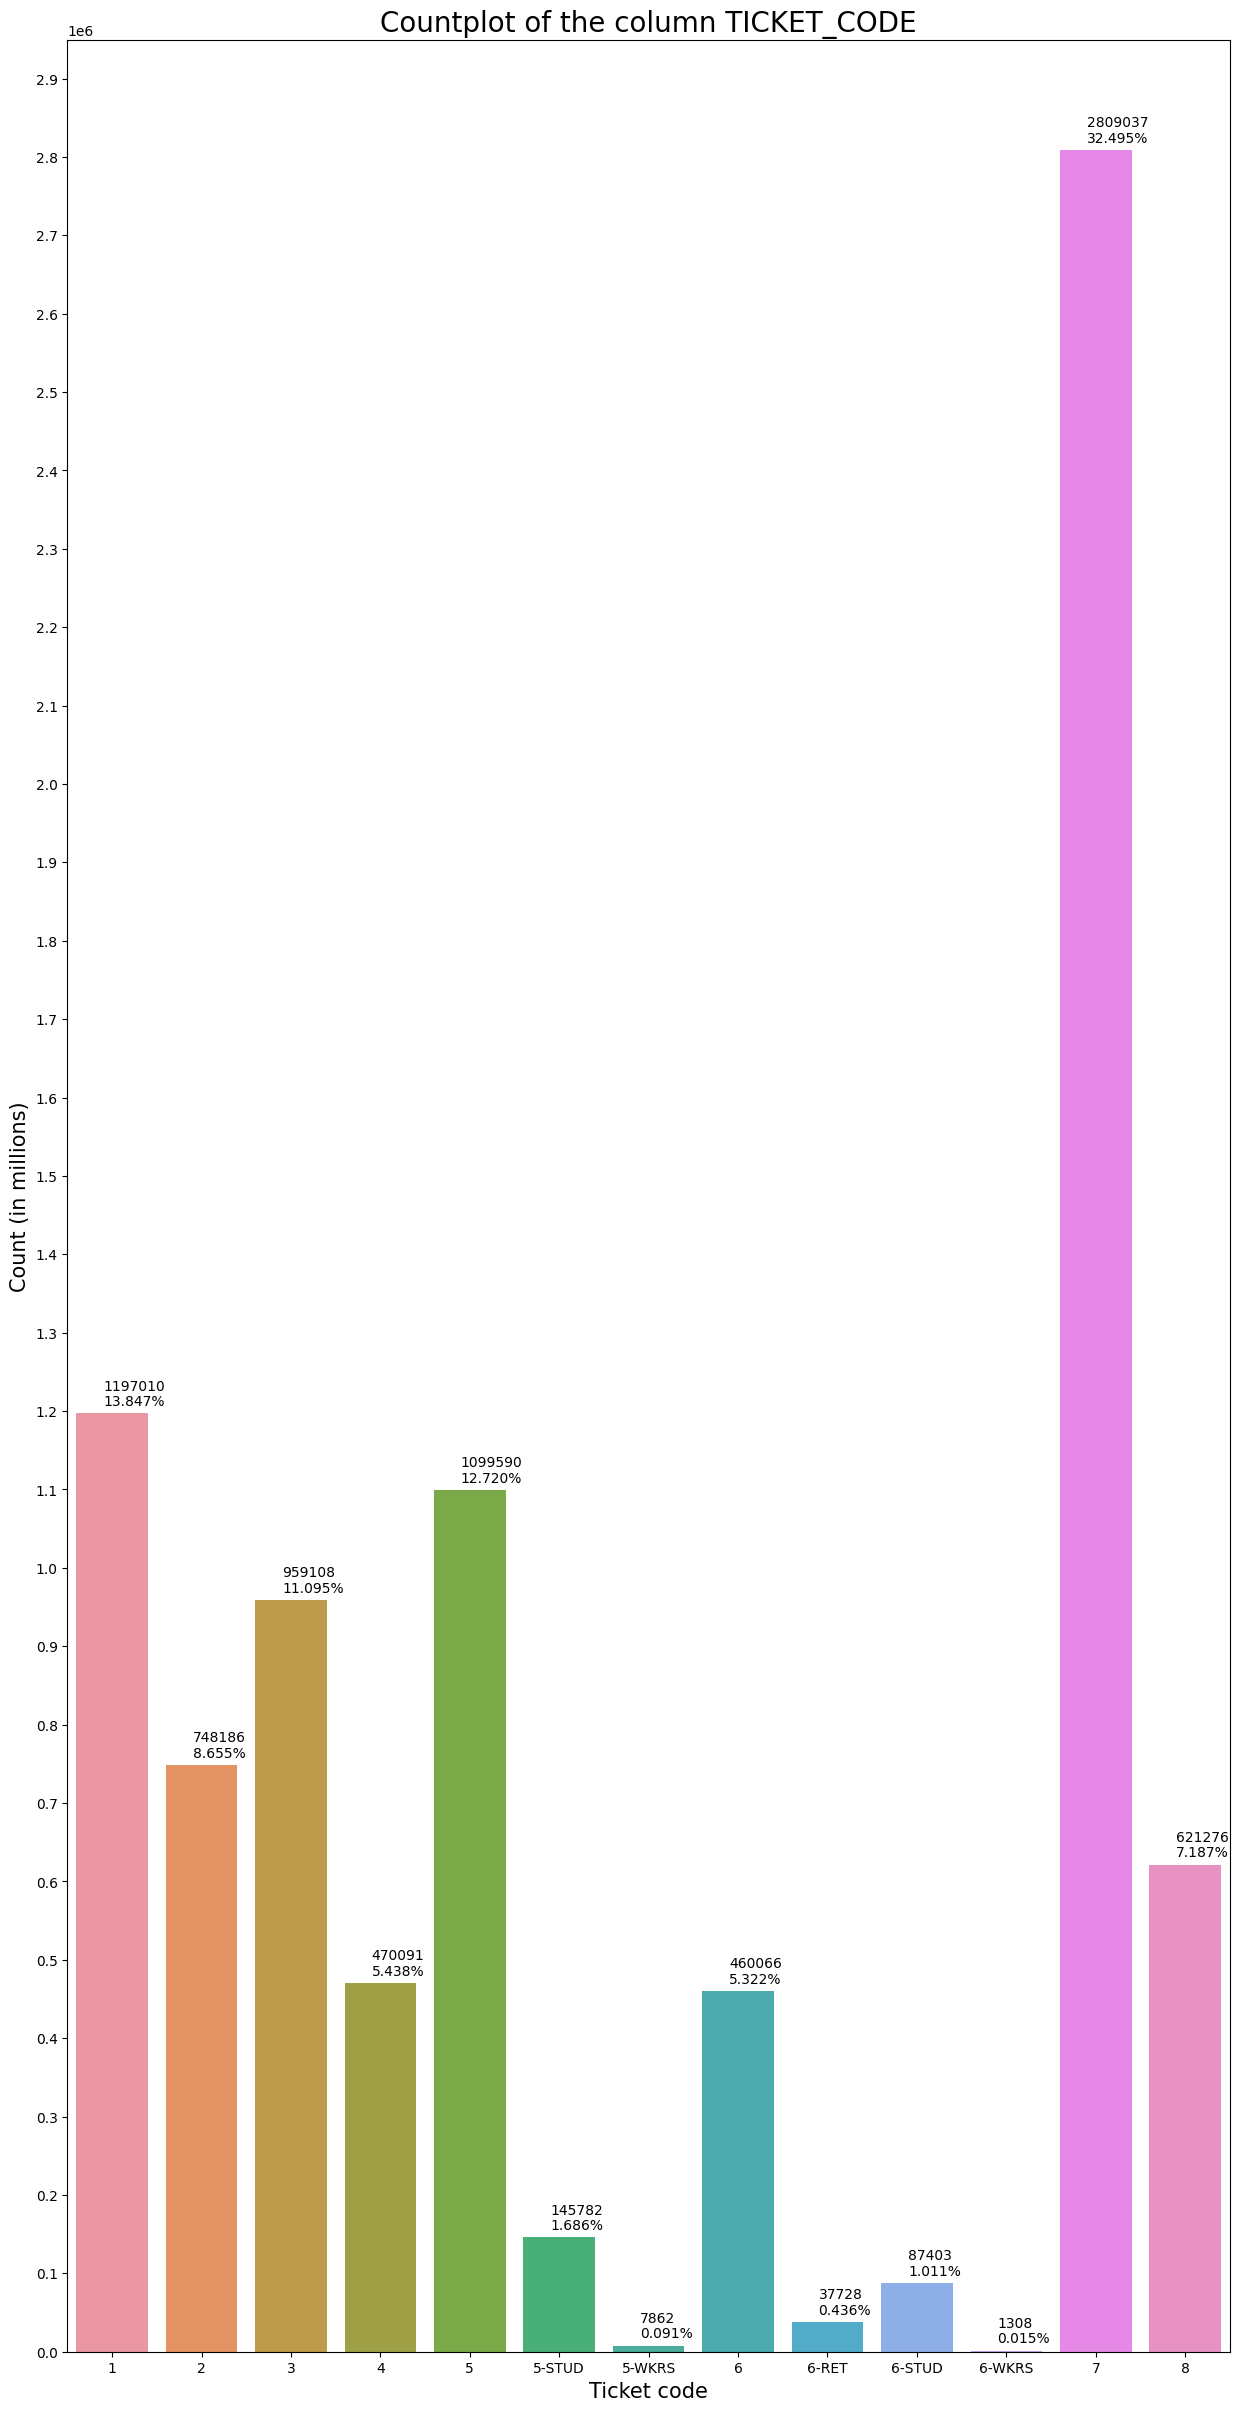

In [432]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

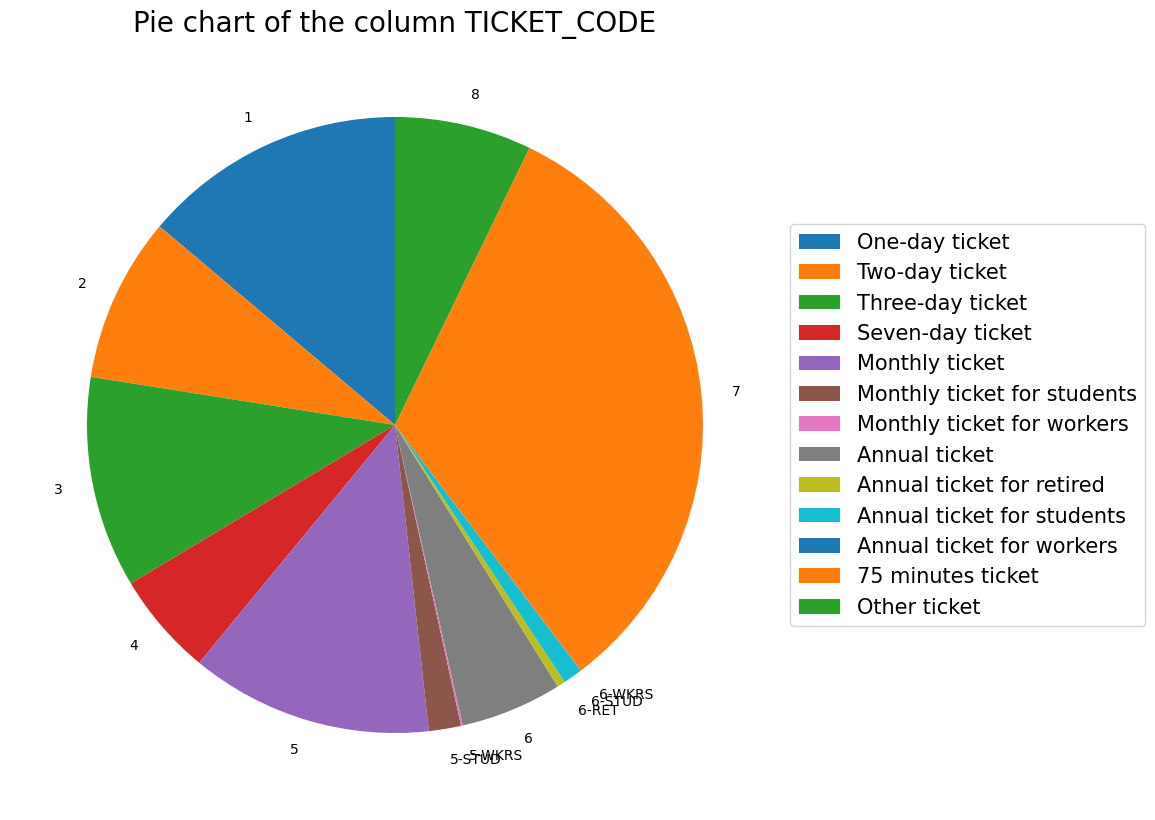

In [433]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(startangle=90)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Delete the validation that are with TICKET_CODE = 8 (other tickets) 

In [434]:
shape_before = df.shape[0]

# Delete 8 tickets because they are not useful for the analysis 
df = df[df['TICKET_CODE'] != '8']

# Print the number of rows before and after the deletion of the 8 tickets and the difference
print('The number of rows before the deletion of the 8 tickets is: {}'.format(shape_before))
print('The number of rows after the deletion of the 8 tickets is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))

# TODO: to de-comment later

The number of rows before the deletion of the 8 tickets is: 8644447
The number of rows after the deletion of the 8 tickets is: 8023171
The difference is: 621276


## Data Cleaning

### Similar stops

In [435]:
# Print the number of unique values in the column 'DESCRIZIONE' that are the names of the stops
print('The number of unique values in the column DESCRIZIONE is: {}'.format(df['DESCRIZIONE'].nunique()))

The number of unique values in the column DESCRIZIONE is: 868


In [436]:
def get_common_prefix(string_list):
    """
        This function returns the common prefix of a list of strings.
        If there is no common prefix, it returns an empty string.
        :param string_list: list of strings
        :return: string that is the common prefix of the list of strings
    """
    first_prefix = string_list[0].split(" ")[0]
    # Create and empty dictionary
    prefix_dict = {}

    # Iterate over the list of strings
    for string in string_list[1:]:
        # Check if the string starts with the first prefix
        if not string.startswith(first_prefix):
            # If the string does not start with the first prefix, split the string and take the first word
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict

In [437]:
# To avoid problem regarding the letters in uppercase and lowercase, convert all the letters in uppercase
df['DESCRIZIONE'] = df['DESCRIZIONE'].str.upper()

In [438]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result

# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

dict_prefix = get_common_prefix(string_list)
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

# Print the number of keys in the dictionary
print('The number of keys in the dictionary is: {}'.format(len(dict_prefix.keys())))

GIUDECCA: ['GIUDECCA PAL']
P.LE: ['P.LE ROMA "E', 'P.LE ROMA "G', 'P.LE ROMA "C', 'P.LE ROMA "B', 'P.LE ROMA "D', 'P.LE ROMA "F']
AEROPORTO: ['AEROPORTO MA']
S.: ['S. MARCO-SAN', 'S. BASILIO', 'S. STAE', 'S. TOMA\' "B"', 'S. MARCUOLA-', 'S.ELENA-STAD', 'S. MARCO VAL', 'S. ANGELO', 'S. GIORGIO', 'S. ALVISE', 'S. PIETRO DI', 'S. MARTA', 'S. SILVESTRO', 'S. MARIA DEL', 'S. ERASMO CA', 'S. ERASMO PU', 'S. ERASMO CH', 'S. MARCO (GI', 'S. SERVOLO', 'S. SAMUELE', 'S. TOMA\' "A"', 'S. MARCO GIA', 'S. PIETRO IN', 'S. LAZZARO']
LIDO: ['LIDO S.M.E. ', 'LIDO S. NICO']
GALILEI: ['GALILEI DARS']
VENEZIA: ['VENEZIA', 'VENEZIA CORS', 'VENEZIA RAMP', 'VENEZIA PIAZ']
PERTINI: ['PERTINI CHIE', 'PERTINI FOSC', 'PERTINI CARR', 'PERTINI GAVA', 'PERTINI VESP']
CA': ["CA' D'ORO", "CA' SABBIONI", "CA' ROSSA SE", "CA' ROSSA VO", "CA' ROSSA OB", "CA' REZZONIC", "CA' LIN ERAC", "CA' SOLARO C", "CA' ROSSA BI", "CA' MARCELLO", "CA' LIN PITA", "CA' LIN GATT", "CA' BIANCA L", "CA' LIN CAST", "CA' SOLARO P", "CA' BIAN

#### Update some keys in the dictionary

In [439]:
# Rename the key 'P.le' with 'P.le Roma'
dict_prefix['P.LE ROMA'] = dict_prefix.pop('P.LE')
# Rename the key 'F.TE' with 'F.TE NOVE'
dict_prefix['F.TE NOVE'] = dict_prefix.pop('F.TE')

In [440]:
# Print the values of the dictionary with the keys 'S.' and 'San'
print('The values of the dictionary with the key S. are: {}'.format(dict_prefix['S.']))
print('The values of the dictionary with the key San are: {}'.format(dict_prefix['SAN']))

The values of the dictionary with the key S. are: ['S. MARCO-SAN', 'S. BASILIO', 'S. STAE', 'S. TOMA\' "B"', 'S. MARCUOLA-', 'S.ELENA-STAD', 'S. MARCO VAL', 'S. ANGELO', 'S. GIORGIO', 'S. ALVISE', 'S. PIETRO DI', 'S. MARTA', 'S. SILVESTRO', 'S. MARIA DEL', 'S. ERASMO CA', 'S. ERASMO PU', 'S. ERASMO CH', 'S. MARCO (GI', 'S. SERVOLO', 'S. SAMUELE', 'S. TOMA\' "A"', 'S. MARCO GIA', 'S. PIETRO IN', 'S. LAZZARO']
The values of the dictionary with the key San are: ['SAN MARCO-SA', 'SANTA MARIA ', "SAN DONA' PA", "SANT'ANTONIO", "SAN DONA' RI", 'SAN MARCO MA', 'SAN MARCO SA', "SAN DONA' MA", "SAN DONA' PI", 'SAN MARCO CA', 'SAN MARCO FO', "SAN DONA' PE", 'SAN MARCO MO', 'SAN LIBERALE', "SAN NICOLO' ", 'SAN MARCO MU', "SAN DONA' CE", 'SAN MARCO BO', 'SANPIETRO CA', "SAN DONA' FA", 'SANTA MARGHE', "SAN DONA' VA", 'SAN ROCCO BR', "SAN NICOLO'", 'SANSOVINO VE', 'SAN PIETRO B', 'SAN PIETRO P', 'SANT´ANNA S', 'SAN PIETRO C', 'SAN TROVASO', "SANT'ANGELO ", 'SAN  GIUSEPP', 'SANDON', 'SANT ANGELO ', '

##### S.Erasmo

In [441]:
# Create a new key in the dictionary with the key S.ERASMO; insert as value the list of strings that have the prefix 'S.ERASMO'
dict_prefix['S.ERASMO'] = [string for string in dict_prefix['S.'] if string.startswith('S.ERASMO')]

# Add the value 'S. Erasmo Pu' originally in the key 'San' to the key 'S.ERASMO'
dict_prefix['S.ERASMO'].append('S. ERASMO PU')

# Remove the strings that have the prefix 'S.ERASMO' from the keys 'S.' and 'San'
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S.ERASMO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. ERASMO PU')]

# Print the values of the dictionary with the key 'S.ERASMO'
print('The values of the dictionary with the key S.ERASMO are: {}'.format(dict_prefix['S.ERASMO']))

The values of the dictionary with the key S.ERASMO are: ['S. ERASMO PU']


##### San Marco

In [442]:
# Create a new key in the dictionary with the key 'San Marco'; insert as value the list of strings that have the prefix 'San Marco'
dict_prefix['SAN MARCO'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN MARCO')]


# Add the value S. MARCO (Gi', 'S. Pietro in Gu') originally in the key 'S.' to the key 'San Marco'
dict_prefix['SAN MARCO'].append('S. MARCO (GI')

# Remove the strings that have the prefix 'San Marco' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN MARCO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. MARCO (GI')]

# Print the values of the dictionary with the key 'San Marco'
print('The values of the dictionary with the key San Marco are: {}'.format(dict_prefix['SAN MARCO']))

The values of the dictionary with the key San Marco are: ['SAN MARCO-SA', 'SAN MARCO MA', 'SAN MARCO SA', 'SAN MARCO CA', 'SAN MARCO FO', 'SAN MARCO MO', 'SAN MARCO MU', 'SAN MARCO BO', 'S. MARCO (GI']


##### San Dona'

In [443]:
# Create a new key in the dictionary with the key 'San Dona'; insert as value the list of strings that have the prefix 'San Dona'
dict_prefix['SAN DONA'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN DONA')]

# Remove the strings that have the prefix 'San Dona' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN DONA')]

# Print the values of the dictionary with the key 'San Dona'
print('The values of the dictionary with the key San Dona are: {}'.format(dict_prefix['SAN DONA']))

The values of the dictionary with the key San Dona are: ["SAN DONA' PA", "SAN DONA' RI", "SAN DONA' MA", "SAN DONA' PI", "SAN DONA' PE", "SAN DONA' CE", "SAN DONA' FA", "SAN DONA' VA"]


#### San Pietro

In [444]:
# Create a new key in the dictionary with the key 'San Pietro'; insert as value the list of strings that have the word 'Pietro' in the string
dict_prefix['SAN PIETRO'] = [string for string in dict_prefix['SAN'] if 'PIETRO' in string] + [string for string in dict_prefix['S.'] if 'PIETRO' in string]

# Remove the strings that have the word 'Pietro' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if 'PIETRO' not in string]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if 'PIETRO' not in string]

# Print the values of the dictionary with the key 'San Pietro'
print('The values of the dictionary with the key San Pietro are: {}'.format(dict_prefix['SAN PIETRO']))

The values of the dictionary with the key San Pietro are: ['SANPIETRO CA', 'SAN PIETRO B', 'SAN PIETRO P', 'SAN PIETRO C', 'S. PIETRO DI', 'S. PIETRO IN']


#### Ca' Rossa

In [445]:
# Create a new key in the dictionary with the key 'Ca' Rossa'; insert as value the list of strings that have the word 'Ca' Rossa' in the string
dict_prefix['CA\' ROSSA'] = [string for string in dict_prefix['CA\''] if 'CA' in string and 'ROSSA' in string]

# Remove the strings that have the word 'Ca' Rossa' from the keys 'Ca''
dict_prefix['CA\''] = [string for string in dict_prefix['CA\''] if 'CA' not in string or 'ROSSA' not in string]

# Print the values of the dictionary with the key 'Ca Rossa'
print('The values of the dictionary with the key Ca\' Rossa are: {}'.format(dict_prefix['CA\' ROSSA']))

The values of the dictionary with the key Ca' Rossa are: ["CA' ROSSA SE", "CA' ROSSA VO", "CA' ROSSA OB", "CA' ROSSA BI"]


##### Manage the remaining values in the keys 'S.' and 'San' and others

In [446]:
# Manage the remaining values in the keys 'S.', 'San', 'Santa', 'Sant'', 'Ca'', 'Piazza', 'Piazzale', 'Stazione', 'Treviso, 'Trento', 'Incr.'
# Create a new key for each value in the keys as above and assign the value as value of the new key
# Remove the values from the keys as above

if 'S.' in dict_prefix:
    for value in dict_prefix['S.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('S.')

if 'SAN' in dict_prefix:
    for value in dict_prefix['SAN']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SAN')

if 'SANTA' in dict_prefix:
    for value in dict_prefix['SANTA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANTA')

if 'SANT\'' in dict_prefix:
    for value in dict_prefix['SANT\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANT\'')

if 'CA\'' in dict_prefix:
    for value in dict_prefix['CA\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('CA\'')

if 'PIAZZA' in dict_prefix:
    for value in dict_prefix['PIAZZA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZA')

if 'PIAZZALE' in dict_prefix:
    for value in dict_prefix['PIAZZALE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZALE')

if 'VIA' in dict_prefix:
    for value in dict_prefix['VIA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('VIA')

if 'STAZIONE' in dict_prefix:
    for value in dict_prefix['STAZIONE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('STAZIONE')

if 'TREVISO' in dict_prefix:
    for value in dict_prefix['TREVISO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TREVISO')

if 'TRENTO' in dict_prefix:
    for value in dict_prefix['TRENTO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TRENTO')

if 'INCR.' in dict_prefix:
    for value in dict_prefix['INCR.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('INCR.')

if 'DE' in dict_prefix:
    for value in dict_prefix['DE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('DE')

#### Treviso and Trento

In [447]:
# Remove the values Treviso, Trento, Trezzo and Treporti from the key 'Tre'
dict_prefix['TRE'] = [string for string in dict_prefix['TRE'] if 'TREVISO' not in string and 'TRENTO' not in string and 'TREZZO' not in string and 'TREPORTI' not in string]

# Print the values of the dictionary with the key 'Tre'
print('The values of the dictionary with the key Tre are: {}'.format(dict_prefix['TRE']))

# TODO: Correct the values of the keys 'Treviso' and 'Trento' with the correct values

The values of the dictionary with the key Tre are: ['TRE ARCHI', 'TREBASELEGHE']


#### Keys with only an item

In [448]:
# If a key as only one value, then rename the key with the value
# Use copy() to avoid RuntimeError: dictionary changed size during iteration
for key, value in dict_prefix.copy().items():
    if len(value) == 1:
        dict_prefix[value[0]] = dict_prefix.pop(key)

##### Finally, the update dictionary is

In [449]:
# Print the dictionary in the new format
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

LIDO: ['LIDO S.M.E. ', 'LIDO S. NICO']
VENEZIA: ['VENEZIA', 'VENEZIA CORS', 'VENEZIA RAMP', 'VENEZIA PIAZ']
PERTINI: ['PERTINI CHIE', 'PERTINI FOSC', 'PERTINI CARR', 'PERTINI GAVA', 'PERTINI VESP']
RIALTO: ['RIALTO "C"', 'RIALTO MERCA', 'RIALTO "D"', 'RIALTO "B"']
GALLO: ['GALLO GALOPP', 'GALLO DEI KI', 'GALLO CONTAR', 'GALLO LOREDA', 'GALLO DEI GI', 'GALLO GIOLIT', 'GALLO MOROSI', "GALLO SANT'A", 'GALLO BRAGAD', 'GALLO TORTA', 'GALLO BIBLIO', 'GALLO BARBAR']
PIAVE: ['PIAVE PODGOR', 'PIAVE PUCCIN', 'PIAVE FIUME']
GIARDINI: ['GIARDINI BIE', 'GIARDINI "B"']
ARSENALE: ['ARSENALE "B"', 'ARSENALE "A"']
ZATTERE: ['ZATTERE "B"', 'ZATTERE "A"']
MESTRE: ['MESTRE CENTR', 'MESTRE RAMPA', 'MESTRE PIAZZ', 'MESTRE STAZI', 'MESTRE VIA T', 'MESTRE VIA M', 'MESTRE VIA P', 'MESTRE VIA A', 'MESTRE VIA H']
TRONCHETTO: ['TRONCHETTO "', 'TRONCHETTO M', 'TRONCHETTO F', 'TRONCHETTO T', 'TRONCHETTO V']
BURANO: ['BURANO "A"', 'BURANO "C"', 'BURANO "B"']
CHIOGGIA: ['CHIOGGIA', 'CHIOGGIA VIA', 'CHIOGGIA PAR', 'CH

In [450]:
# Export the dictionary in a json file
name_file = 'dict_prefix_' + file_name.split('.')[0] + '.json'
with open('data/dictionaries/' + name_file, 'w') as fp:
    json.dump(dict_prefix, fp)

### Useless stamps

In [451]:
# due to large dataset, divide the dataset into 4 parts and execute the code below for each part
df_part1 = df.iloc[:int(df.shape[0]/4)]
df_part2 = df.iloc[int(df.shape[0]/4):int(df.shape[0]/2)]
df_part3 = df.iloc[int(df.shape[0]/2):int(3*df.shape[0]/4)]
df_part4 = df.iloc[int(3*df.shape[0]/4):]

# Export the 4 parts of the dataset in 4 different txt files
df_part1.to_csv('data/raw/3-df_part1.txt', sep='\t', index=False)
df_part2.to_csv('data/raw/3-df_part2.txt', sep='\t', index=False)
df_part3.to_csv('data/raw/3-df_part3.txt', sep='\t', index=False)
df_part4.to_csv('data/raw/3-df_part4.txt', sep='\t', index=False)

# For each part, execute the code below
# for da 1 a 4
import datetime
for i in range(1,5,1):
    print('Part {}'.format(i))
    df = pd.read_csv('data/raw/3-df_part{}.txt'.format(i), sep='\t', low_memory=False)
    df.head()
    # Set to datetime the columns 'DATA_VALIDAZIONE' and 'DATA' and 'ORA' in the format '%d/%m/%Y %H:%M:%S'
    df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'], format='%Y/%m/%d %H:%M:%S')
    df['ORA'] = pd.to_datetime(df['ORA'], format='%H:%M:%S')
    df['DATA'] = pd.to_datetime(df['DATA'], format='%Y/%m/%d')

    df.reset_index(drop=True, inplace=True)
    print('The shape of the dataset is: {}'.format(df.shape))

    print("ora MIN_TEMPORAL_GAP: ", datetime.datetime.now())
    df = df.groupby(['SERIALE','DATA', 'DESCRIZIONE']).apply(lambda x: x.assign(MIN_TEMPORAL_GAP = x['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60))
    
    print("fine MIN_TEMPORAL_GAP: ", datetime.datetime.now())

    df.head(20)
    df.tail(20)

    df['MIN_TEMPORAL_GAP'].value_counts()

    # Cleaning operation: remove the rows using the minimum temporal gap

    # Find a reasonable delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
    # Print the minimum value of the column MIN_TEMPORAL_GAP
    print('The minimum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].min()))

    # Print the maximum value of the column MIN_TEMPORAL_GAP
    print('The maximum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].max()))

    # Print the mean value of the column MIN_TEMPORAL_GAP
    print('The mean value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].mean()))

    # Print the median value of the column MIN_TEMPORAL_GAP
    print('The median value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].median()))

    # Print the 0.10th percentile of the column MIN_TEMPORAL_GAP
    print('The 0.10th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.10)))

    # Print the 25th percentile of the column MIN_TEMPORAL_GAP
    print('The 25th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.25)))

    # Decide the delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
    delta = df['MIN_TEMPORAL_GAP'].quantile(0.1)
    if delta == 0:
        delta = df['MIN_TEMPORAL_GAP'].quantile(0.25)
    if delta == 0:
        delta = df['MIN_TEMPORAL_GAP'].median()

    print('The delta of MIN_TEMPORAL_GAP is: {}'.format(delta))

    # save in the list the delta
    list_delta = []
    list_delta.append(delta)
    
    # Export the dataframe in a txt file
    # The name of the file is dataset_cleaned followed by the name (file_name variable) of the file that has been cleaned with txt extension
    name_file = 'data/processed/3-interm_' + file_name.split('.')[0] + 'part_{}.txt'.format(i)
    df.to_csv(name_file, sep='\t', index=False)

    print('The script has finished for part {}'.format(i))


Part 1
The shape of the dataset is: (2005792, 9)
ora MIN_TEMPORAL_GAP:  2023-06-25 17:15:43.816233
fine MIN_TEMPORAL_GAP:  2023-06-25 17:41:07.611000
The minimum value of the column MIN_TEMPORAL_GAP is: 0.0
The maximum value of the column MIN_TEMPORAL_GAP is: 1439.0
The mean value of the column MIN_TEMPORAL_GAP is: 137.91643868928202
The median value of the column MIN_TEMPORAL_GAP is: 5.0
The 0.10th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The 25th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The delta of MIN_TEMPORAL_GAP is: 5.0
The script has finished for part 1
Part 2
The shape of the dataset is: (2005793, 9)
ora MIN_TEMPORAL_GAP:  2023-06-25 17:41:21.126581
fine MIN_TEMPORAL_GAP:  2023-06-25 18:04:09.466875
The minimum value of the column MIN_TEMPORAL_GAP is: 0.0
The maximum value of the column MIN_TEMPORAL_GAP is: 1437.0
The mean value of the column MIN_TEMPORAL_GAP is: 135.6186734799368
The median value of the column MIN_TEMPORAL_GAP is: 4.0
The 0.10th percentile of

In [459]:
# delta = min(list_delta)
delta = 4.0
print('The delta of MIN_TEMPORAL_GAP is: {}'.format(delta))

for i in range(1,5,1):
    df = pd.read_csv('data/processed/3-interm_' + file_name.split('.')[0] + 'part_{}.txt'.format(i), sep='\t', low_memory=False)
    
    # Save the number of rows before the cleaning operation
    shape_before = df.shape[0]

    # Delete the rows that have a minimum temporal gap for the same serial and fermata more than the delta calculated before.
    # Do not remove the rows with NaN values because they are the first validations of the day of a specific serial and fermata usefull for the analysis
    df = df[(df['MIN_TEMPORAL_GAP'] > delta) | (df['MIN_TEMPORAL_GAP'].isna())]

    # Print the number of rows before and after the cleaning operation and the difference
    print('The number of rows before the cleaning operation is: {}'.format(shape_before))
    print('The number of rows after the cleaning operation is: {}'.format(df.shape[0]))
    print('The difference is: {}'.format(shape_before - df.shape[0]))
    # Calculate the percentage of rows that has just been deleted
    print('The percentage of rows that has just been deleted is: {}%'.format(round((shape_before - df.shape[0])/shape_before*100, 2)))

    # Delete the column MIN_TEMPORAL_GAP because it is not useful anymore
    df.drop('MIN_TEMPORAL_GAP', axis=1, inplace=True)

    df_new = df.copy() 

    # Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
    # the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
    for key, value in dict_prefix.items():
        df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


    # Print the head of the new dataframe
    print(df_new.head())

    # Export the new dataframe in a txt file
    # The name of the file is dataset_cleaned followed by the name (file_name variable) of the file that has been cleaned with txt extension
    name_file = 'dataset_cleaned_' + file_name.split('.')[0] + 'part_{}.txt'.format(i)
    df_new.to_csv('data/processed/' + name_file, sep='\t', index=False)

The delta of MIN_TEMPORAL_GAP is: 4.0
The number of rows before the cleaning operation is: 2005792
The number of rows after the cleaning operation is: 1940558
The difference is: 65234
The percentage of rows that has just been deleted is: 3.25%
         DATA                  ORA     DATA_VALIDAZIONE     SERIALE  FERMATA  \
0  2023-04-04  1900-01-01 00:00:00  2023-04-04 00:00:00 -2854957894     5032   
1  2023-04-04  1900-01-01 00:00:00  2023-04-04 00:00:00 -2854992707     5032   
2  2023-04-04  1900-01-01 00:00:00  2023-04-04 00:00:00 -2821778289     5022   
3  2023-04-04  1900-01-01 00:00:00  2023-04-04 00:00:00 -3613120484     5028   
4  2023-04-04  1900-01-01 00:00:00  2023-04-04 00:00:00 -3604951458     5028   

    DESCRIZIONE  TITOLO TICKET_CODE            DESCRIZIONE_TITOLO  
0      FERROVIA   11209           7           BIGL RETE UNICA 75'  
1      FERROVIA   23101           5  MENSILE ORDINARIO RETE UNICA  
2  GIUDECCA PAL   23101           5  MENSILE ORDINARIO RETE UNICA  
3  

In [460]:
# Concatenate the 4 parts of the dataset cleaned
df_cleaned = pd.concat([pd.read_csv('data/processed/dataset_cleaned_' + file_name + 'part_{}.txt'.format(i), sep='\t', low_memory=False) for i in range(1,5,1)], ignore_index=True)

# Export the dataset cleaned in a txt file
name_file = 'dataset_cleaned_' + file_name.split('.')[0] + '.txt'
df_cleaned.to_csv('data/processed/' + name_file, sep='\t', index=False)

# Print the number of rows of the dataset cleaned
df_old = pd.read_csv('data/raw/3-' + file_name +'.txt', sep='\t', low_memory=False)
shape_before = df_old.shape[0]
print('The number of rows before the cleaning operation is: {}'.format(shape_before))
print('The number of rows after the cleaning operation is: {}'.format(df_cleaned.shape[0]))
print('The difference is: {}'.format(shape_before - df_cleaned.shape[0]))
# Calculate the percentage of rows that has just been deleted
print('The percentage of rows that has just been deleted is: {}%'.format(round((shape_before - df_cleaned.shape[0])/shape_before*100, 2)))

print('The script has finished with success!')

The number of rows before the cleaning operation is: 8644447
The number of rows after the cleaning operation is: 7751201
The difference is: 893246
The percentage of rows that has just been deleted is: 10.33%
The script has finished with success!


In [ ]:
# TODO: #1 Remove useless rows that have a minimum temporal gap for the same serial and fermata
# DE-COMMENT THE FOLLOWING LINES OF CODE

In [ ]:
# # Find the serial with the hightest number of validations, and the same for each ticket profile, save the results in a dictionary
# dict_serial = {}
# for ticket in df['TICKET_CODE'].unique():
#     dict_serial[ticket] = df[df['TICKET_CODE'] == ticket]['SERIALE'].value_counts().index[0]

# # Print the serial with the hightest number of validations, and the same for each ticket profile
# for ticket in df['TICKET_CODE'].unique():
#   print('The serial with the hightest number of validations for the ticket profile {} is: {}'.format(ticket, dict_serial[ticket]))

In [ ]:
# Group by the serial and the fermata 
# df = df.groupby(['SERIALE', 'FERMATA']).apply(lambda x: x.sort_values(by='DATA_VALIDAZIONE', ascending=True))

# Print the first 5 rows of the df
# df.head()
# DO NOT DE-COMMENT THIS CELL

In [ ]:
# Reset the index of the df and drop the old index in order to have a new index starting from 0 to the number of rows
# It is necessary to have a new index because the groupby function has created a multi-index
# df.reset_index(drop=True, inplace=True)

In [ ]:
# Create a new column 'MIN_TEMPORAL_GAP' that contains the minimum temporal gap between two validations for the same serial and fermata in minutes
# df = df.groupby(['SERIALE','DATA', 'DESCRIZIONE']).apply(lambda x: x.assign(MIN_TEMPORAL_GAP = x['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60))

In [ ]:
# df.head(20)

In [ ]:
# df.tail(20)

In [ ]:
# df['MIN_TEMPORAL_GAP'].value_counts()

In [ ]:
# # How many rows have a minimum temporal gap equal to NaN?
# df[df['MIN_TEMPORAL_GAP'].isna()].shape[0]

In [ ]:
# # Cleaning operation: remove the rows using the minimum temporal gap

# # Find a reasonable delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
# # Print the minimum value of the column MIN_TEMPORAL_GAP
# print('The minimum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].min()))

# # Print the maximum value of the column MIN_TEMPORAL_GAP
# print('The maximum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].max()))

# # Print the mean value of the column MIN_TEMPORAL_GAP
# print('The mean value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].mean()))

# # Print the median value of the column MIN_TEMPORAL_GAP
# print('The median value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].median()))

# # Print the standard deviation of the column MIN_TEMPORAL_GAP
# print('The standard deviation of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].std()))

# # Print the 0.05th percentile of the column MIN_TEMPORAL_GAP
# print('The 0.05th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.05)))

# # Print the 0.10th percentile of the column MIN_TEMPORAL_GAP
# print('The 0.10th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.10)))

# # Print the 25th percentile of the column MIN_TEMPORAL_GAP
# print('The 25th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.25)))

# # Print the 75th percentile of the column MIN_TEMPORAL_GAP
# print('The 75th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.75)))

# # Print the 90th percentile of the column MIN_TEMPORAL_GAP
# print('The 90th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.90)))

# # Print the 95th percentile of the column MIN_TEMPORAL_GAP
# print('The 95th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.95)))

# # Print the 99th percentile of the column MIN_TEMPORAL_GAP
# print('The 99th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.99)))

# # Print the 99.9th percentile of the column MIN_TEMPORAL_GAP
# print('The 99.9th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.999)))

# # Decide the delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
# delta = df['MIN_TEMPORAL_GAP'].quantile(0.1)
# if delta == 0:
#     delta = df['MIN_TEMPORAL_GAP'].quantile(0.25)
# if delta == 0:
#     delta = df['MIN_TEMPORAL_GAP'].median()
# print('The delta of MIN_TEMPORAL_GAP is: {}'.format(delta))

In [ ]:
# # Cleaning operation: remove the rows using the minimum temporal gap

# # Save the number of rows before the cleaning operation
# shape_before = df.shape[0]

# # Delete the rows that have a minimum temporal gap for the same serial and fermata more than the delta calculated before.
# # Do not remove the rows with NaN values because they are the first validations of the day of a specific serial and fermata usefull for the analysis
# df = df[(df['MIN_TEMPORAL_GAP'] > delta) | (df['MIN_TEMPORAL_GAP'].isna())]

# # Print the number of rows before and after the cleaning operation and the difference
# print('The number of rows before the cleaning operation is: {}'.format(shape_before))
# print('The number of rows after the cleaning operation is: {}'.format(df.shape[0]))
# print('The difference is: {}'.format(shape_before - df.shape[0]))
# # Calculate the percentage of rows that has just been deleted
# print('The percentage of rows that has just been deleted is: {}%'.format(round((shape_before - df.shape[0])/shape_before*100, 2)))

In [ ]:
# # Delete the column MIN_TEMPORAL_GAP because it is not useful anymore
# df.drop('MIN_TEMPORAL_GAP', axis=1, inplace=True)

In [ ]:
# # Create a new dataframe, copied from the original one
# df_new = df.copy() 

# # Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
# # the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
# for key, value in dict_prefix.items():
#     df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


# # Print the head of the new dataframe
# print(df_new.head())

# # Export the new dataframe in a txt file
# # The name of the file is dataset_cleaned followed by the name (file_name variable) of the file that has been cleaned with txt extension
# name_file = 'dataset_cleaned_' + file_name.split('.')[0] + '.txt'
# df_new.to_csv('data/processed/' + name_file, sep='\t', index=False)

# print('The script has finished')